# DSCI 512 Lecture 4: Trees


Outline: 

- Recursive data structures
- Simple trees 
- Binary search trees
- Nearest neighbours intro 
- $k$-d trees
- Amortization
- True/False questions

## Recursive data structures

- We have seen various nested data structures, like lists of lists:

In [ ]:
x = [[1,2,3],['a','b','c']]

Or dicts of dicts

In [2]:
pos_counts = {"fight":{"VB": 55,"NN":23}, "clobber":{"VB":7}}

![](https://upload.wikimedia.org/wikipedia/commons/7/71/Russian-Matroshka.jpg)

(Image attribution to Fanghong, from [Wikipedia article](https://en.wikipedia.org/wiki/Matryoshka_doll).)

- We can call these "nested data structures". We could also call them "hierarchical".
- But we can go a step beyond that, where the definition of the data type is ITSELF recursive.
- Consider a Russian Doll _data type_, which would define various physical attributes (size, colour, etc.) plus a link to the doll that fits inside it.
- We'll actually use the metaphor of a magical treasure box where each box contains both another box as well as a "treasure" 

In [3]:
class TreasureBox:
    def __init__(self, treasure):
        self.innerTreasureBox = None
        self.treasure = treasure
        
    def append_outer(self, treasure):
        """Add a new treasure box to the outside, put everything else inside it."""
        new_box = TreasureBox(treasure)
        new_box.innerTreasureBox = self
        return new_box

    def append_inner(self, treasure):  
        """Add a new treasure box inside the innermost current box."""
        if self.innerTreasureBox is None:
            new_box = self.innerTreasureBox = TreasureBox(treasure)
        else:
            new_box =  self.innerTreasureBox.append_inner(treasure)
        return new_box
        
    def get(self, depth):
        """Get the treasure by going depth levels deep into the treasure boxes."""
        if depth == 0:
            return self.treasure

        if self.innerTreasureBox is None:
            return None # Index out of bounds
    
        return self.innerTreasureBox.get(depth-1)

In [5]:
box = TreasureBox(5)

box = box.append_outer(7)
box = box.append_outer(10)

Note that the box variable points to the outermost box.

The get function allows us to recusively step into the boxes and get their treasures

In [6]:
box.get(0)

10

In [7]:
box.get(1)

7

In [8]:
box.get(2)

5

In [9]:
box.get(3)

In [10]:
box = TreasureBox(5)

box.append_inner(7)
box.append_inner(10)

Note that box still points to the outer box, since we didn't assign it.

In [11]:
box.get(0)

5

In [12]:
box.get(1)

7

In [13]:
box.get(2)

10

In [14]:
box.get(3)

- In computer science, this is called a [linked list](https://en.wikipedia.org/wiki/Linked_list).
- It's not just a nested data structure (list of lists); the data type itself is recursive. 
- (optional) Note that our generators are like linked lists, hopping from one item to the next.

Take-home ideas:

- Relationship between recursive function calls (see `append_inner` and `get`) and recursive data types (see `__init__`).
- The signature of a recursive data type is that an instance of the class contains one or more instances of that type.
  - In our case, each `TreasureBox` contains another `TreasureBox` (or `None`).
- Recursion is an important idea in understanding algorithms _and_ data structures.

## Trees basics

Trees are recursive data structures, like the linked lists above.

![](https://upload.wikimedia.org/wikipedia/commons/2/2e/Organizational_chart.svg)

(Image attribution to TotoBaggins, from [Wikipedia article](https://en.wikipedia.org/wiki/Organizational_chart).)

Tree terminology:

- A tree is either empty or a node with zero or more _children_ that are themselves trees (or "subtrees").
- If $X$ is the child of $Y$, then $Y$ is the _parent_ of $X$ (e.g. Captain A is a child of Colonel B; Colonel B is the parent of Captain A).
- The _root_ is the only node without a parent (e.g. General).
- A _leaf_ is a node that does not have children (e.g. Private A).
- An _internal node_ is a node that is not a leaf (e.g. Captain A).
- The _height_ of the tree is the number of nodes on the longest path from the root to a leaf (here, 5).
- Some trees might have a _label_ associated with each node (or other some other data which it contains, e.g. a _value_)


Let's build a simple _binary tree_  class using Python. A binary tree is a tree where each node has at most 2 children. So each tree node will have a label and two children:

In [8]:
class BinaryTree:
    def __init__(self,label):
        #my code here
        self.label = label
        self.left = None
        self.right = None      
        #my code here

Let's manually build a binary tree containing some of the information in the example above

In [9]:

root = BinaryTree("General")
root.left = BinaryTree("Colonel A")
root.right = BinaryTree("Colonel B")
#my code here
root.right.left = BinaryTree("Captain A")
root.right.right = BinaryTree("Captain B")
#my code here

**Questions**: What are the number of leaf nodes in our tree? Internal nodes? What is the height?

**Answers**: <span style="background-color:black;"> There are 3 leaf nodes, 2 internal nodes (General and Colonel B), and the height of the tree is 3 </span>

We can exhaustively search this simple tree looking for a particular label using a recursive function

In [10]:
def full_search(tree, target):
    # my code here
    if tree == None:
        return False
    if tree.label == target:
        return True
    else:
        return full_search(tree.left,target) or full_search(tree.right,target)
    # my code here

In [11]:
print(full_search(root,"Captain A"))
print(full_search(root,"Private A"))

True
False


Exercise: Modify `full_search` to become a function called `count_ranks` which counts how many nodes of our tree of ranks have labels which start with a particular rank (e.g. Colonel). Don't assume that any particular rank is at any particular depth in the tree

In [24]:
def count_ranks(tree, rank):
    # your code here
    if tree == None:
        return 0
    count = 0
    if tree.label.startswith(rank):
        count += 1
    return count + count_ranks(tree.left,rank) + count_ranks(tree.right,rank)
    # your code here

In [25]:
print(count_ranks(root,"Colonel"))
print(count_ranks(root,"Captain"))

2
2


## Binary search trees

- In lab, you are implementing a set based on trees instead of a hash table.
- In particular this data structure is called a [binary search tree](https://www.geeksforgeeks.org/binary-search-tree-data-structure/).
- A binary tree is a _binary search tree_ if, for all nodes, all keys in its left subtree are smaller than its key, and all keys in its right subtree are larger than its key.
- Requirement to use BSTs: we must be able to compare keys.
- Compare this to a hash table: we need to be able to hash the keys. 

Computational complexity: 

- Binary search trees (BSTs) can be slow if they become very unbalanced.
- Industrial strength implementations stay balanced and are still efficient.
- Deletion is more tricky and we won't cover it here.
- But the take-home message is that search/insert/delete all run in $O(\log n)$ time, which is pretty fast.

## Nearest neighbours intro

- A common problem in data science is to find the _nearest neighbours_ of a point.
- We can start in 2D:

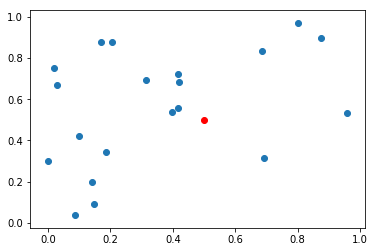

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 20
np.random.seed(1)
X = np.random.rand(n,2)
plt.scatter(X[:,0], X[:,1]);
plt.plot(0.5, 0.5, '.r', markersize=12);

- Which blue points are nearest to the red ("query") point?
  - Note: to define "nearest" we need a notion of _distance_.
  - For now, we'll use Euclidean distance.
  - In future courses, this might change.
  - Choosing a distance metric is actually important in ML.

The algorithmic approach is:

1. Find the distance from the red point to all the blue points.
2. Find the smallest distances.

In [27]:
# It's OK if you don't understand this code, especially during lecture

def nearest_neighbour(data, query):
    """
    Find points in the data that are nearest to the query point.
    
    Arguments:
    data -- (numpy.ndarray) a 2D array containing the points as rows
    query -- (numpy.ndarray) a 1D array containing the query point
    """
    if query.ndim == 1:
        query = query[None]
        
    return np.argsort(np.sum((data - query)**2,axis=1))

In [28]:
query = np.array([0.5,0.5])
nn = nearest_neighbour(X, query)
nn

array([ 8,  4,  5,  0, 17, 11,  3, 18, 15, 16,  9,  6, 14,  7,  1,  2, 19,
       12, 10, 13], dtype=int64)

In [29]:
X[nn[0]]

array([0.4173048 , 0.55868983])

In [30]:
X[nn[1]]

array([0.39676747, 0.53881673])

**Question:** what is the time complexity if we have $n$ points in $d$ dimensions?

**Answer:** <span style="background-color:black;"> $O(nd)$, because we have to loop over all $n$ points, and computing the distance requires looping over the $d$ dimensions.</span>

- Problem: this may be way too slow!
- For example, if you want to find similar items on Amazon, and they have a billion items, you don't want to have to look through _all_ of them every time.

## $k$-d trees


- Sometimes we speed things up with faster algorihtms.
- But, as we've seen with trees and hash tables, sometime we speed things up with _better data structures_. 
- One of the classic ways to speed up nearest neighbours is a data structure called the [$k$-d tree](https://en.wikipedia.org/wiki/K-d_tree).

In [31]:
# Students:
# You do not need to read/understand this code,
# But I think you're capable of understanding it with a bit of time spent.
# Feel free to ask if you have questions!

class KDTree:
    def __init__(self):
        self.location = None
        self.leftSubTree = None
        self.rightSubTree = None
        self.dim = None
        self.data = None
        
    def build(self, data, depth=0):
        """
        Build the k-d tree from the given data.
        Implementation inspired by https://en.wikipedia.org/wiki/K-d_tree
        
        Arguments:
        data -- (numpy.ndarray) a 2D array where each row is a point in space
        depth -- (int) this can be ignored, for internal bookkeeping (default: 0)
        """
        nrows = data.shape[0]
        self.dim = depth % data.shape[1]
        self.data = data
        
        self.location = np.median(data[:,self.dim])
        # above, or just data[nrows//2,dim] after sorting
        # although this one will average if there's a tie.
        
        if nrows == 1:
            return
        
        data = data[np.argsort(data[:,self.dim])]
        
        self.leftSubTree = KDTree()
        self.leftSubTree.build(data[:nrows//2], depth+1)
        
        self.rightSubTree = KDTree()
        self.rightSubTree.build(data[nrows//2:], depth+1)
    
    def approximateNearestNeighbour(self, query):
        """
        Find the nearest neighbor to the query point.
        However, this is just approximate; it finds a point in
        the same rectangle, not necessarily the actual nearest neighbour.
        This is just for educational purposes; a correct algorithm
        exists but it's too messy to put here.
        
        Arguments:
        query -- (numpy.ndarray) a point in space
        """
        if self.data.shape[0] == 1:
            return self.data[0]
        
        if query[self.dim] < self.location:
            return self.leftSubTree.approximateNearestNeighbour(query)
        else:
            return self.rightSubTree.approximateNearestNeighbour(query)
    
    def plot2d(self, depth=1, minx=0.0, maxx=1.0, miny=0.0, maxy=1.0):
        """
        Plot the k-d tree.
        
        Arguments:
        depth -- (int) how deep to go down the tree when plotting (defult: 0)
        minx -- (int) the left   edge of the plot (default: 0.0)
        maxx -- (int) the right  edge of the plot (default: 1.0)
        miny -- (int) the bottom edge of the plot (default: 0.0)
        maxy -- (int) the top    edge of the plot (default: 0.0)
        """
        if depth == 0:
            return
                
        if self.dim == 0:
            plt.plot((self.location, self.location), (miny, maxy), 'k');
            if self.leftSubTree is not None:
                self.leftSubTree.plot2d( depth-1, minx=minx, maxx=self.location, miny=miny, maxy=maxy)
            if self.rightSubTree is not None:
                self.rightSubTree.plot2d(depth-1, minx=self.location, maxx=maxx, miny=miny, maxy=maxy)
        elif self.dim == 1:
            plt.plot((minx, maxx), (self.location, self.location), 'k');
            if self.leftSubTree is not None:
                self.leftSubTree.plot2d( depth-1, minx=minx, maxx=maxx, miny=miny, maxy=self.location)
            if self.rightSubTree is not None:
                self.rightSubTree.plot2d(depth-1, minx=minx, maxx=maxx, miny=self.location, maxy=maxy)


Basic idea: 
- In each recursive step, there is a certain number of datapoints. If there's only one, we're done.
- Otherwise, for one of the two dimensions (we alternate back and forth), find the median value along the dimension
- Split the data into two subsets based on being above or below that median, and build a (sub)tree for each of those subsets
- Starting from the full dataset, you will create a tree where each leaf is a datapoint
- You can find an approximate nearest neighbour by tranversing the down the tree using the same decision points as were used to original split the data, the final leaf is the desired neighbour

In [32]:
kdt = KDTree()
kdt.build(X)

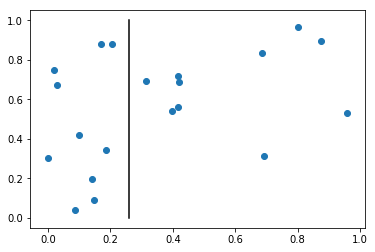

In [33]:
plt.scatter(X[:,0], X[:,1]);
kdt.plot2d(depth=1)

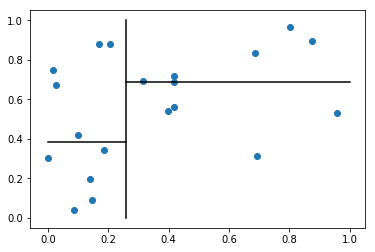

In [35]:
plt.scatter(X[:,0], X[:,1]);
kdt.plot2d(depth=2)

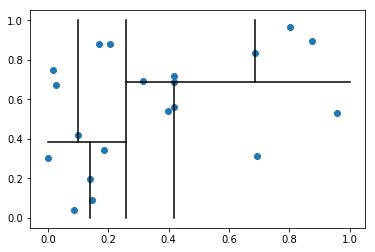

In [36]:
plt.scatter(X[:,0], X[:,1]);
kdt.plot2d(depth=3)

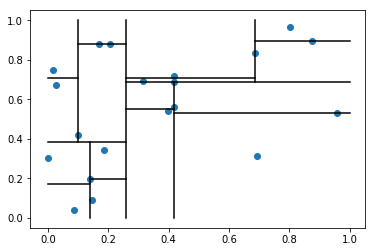

In [37]:
plt.scatter(X[:,0], X[:,1]);
kdt.plot2d(depth=4)

In [38]:
kdt.approximateNearestNeighbour(np.array([1,1]))

array([0.87638915, 0.89460666])

In [39]:
kdt.approximateNearestNeighbour(np.array([0.5,0.5]))

array([0.69187711, 0.31551563])

- Doesn't work perfectly here, but there is a fast correct algorithm to find the true nearest neighbour
- See [`sklearn.neighbors.KDTree`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree).
- However, $k$-d trees get slow when the number of dimensions is large.
- Some alternative methods are discussed below.

#### Timing experiments

In [40]:
from collections import defaultdict
import pandas as pd
import sklearn.neighbors

In [43]:
n_sizes = [100, 1000, 10000, 100000]

results = defaultdict(list)
results["n"] = n_sizes

d = 10

for n in n_sizes:
    print('n: ', n) 
    X = np.random.rand(n, d)
    query = np.random.rand(1, d)
    
    print("  KDTree")
    time = %timeit -q -o -r 3 sklearn.neighbors.KDTree(X)
    results["KDTree init"].append(time.average)
    KDT = sklearn.neighbors.KDTree(X)

    time = %timeit -q -o -r 3 KDT.query(query)
    results["KDTree query"].append(time.average)

    print("  Brute force")
    time = %timeit -q -o -r 3 nearest_neighbour(X, query)
    results["Brute force"].append(time.average)


n:  100
  KDTree
  Brute force
n:  1000
  KDTree
  Brute force
n:  10000
  KDTree
  Brute force
n:  100000
  KDTree
  Brute force


In [44]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,n,KDTree init,KDTree query,Brute force
0,100,0.000057,0.000044,0.000015
1,1000,0.000519,0.000061,0.000085
2,10000,0.008075,0.000117,0.000974
3,100000,0.152193,0.000157,0.018892


**Question:** what does the time complexity look like for the 3 columns?

**Answer:** <span style="background-color:black;"> brute force looks linear, the query looks logarithmic(?), the initialization grows _faster than linear_, perhaps $O(n \log n)$ or perhaps something else, we won't worry about that here. </span>

**Question:** which is better, the $k$-d tree or brute force?

**Answer:** <span style="background-color:black;">it depends how many queries you do.</span>

## Amortization

Let's focus on $n=10000$, and $d=10$. Then,

- $k$-d tree initialization takes $\approx 8$ ms
- $k$-d tree query takes $\approx 0.1$ ms
- brute force search takes $\approx 1$ ms

**Question:** How many queries do we need to do such that the $k$-d tree is better?

**Answer:** <span style="background-color:black;"> around 9. </span>

- So if we're doing 100 queries, the $k$-d tree is much better.
- This reflects a general phenomenon in algorithms: _doing a lot of work up front to save time later_.
- We say the up-front effort is _amortized_ (or spread out) over the many queries.
- In some cases, we can make more precise calculations.
  - For example, we say hash table operations are $O(1)$.
  - In fact, once in a while a slower operation must be done.
  - However, we can show that an $O(n)$ operation only needs to be done every $1/n$ steps.
  - In which case we say the cost is amortized and the overall cost is still $O(1)$. 

## True/False questions

1. A `TreasureBox` contains a copy of itself.
2. If you have a `TreasureBox` with $n$ items, adding a new `TreasureBox` inside of all the others is $O(n)$.
3. A tree is similar to the `TreasureBox`, except that you can have multiple treasure boxes inside each treasure box.
4. A binary tree of height 4 can have at most 8 leaves. 
5. A binary search tree would be an appropriate data structure to store the military org chart above.

#### Round 2

1. Computing the (Euclidean) distance between two points in $d$ dimensions takes $O(d)$ time.
2. To find the nearest neighbour of a query point within a dataset, we must search through all $n$ points in the dataset.
3. After a $k$-d tree partitions the space, the nearest neighbour to a query point will be in the same partition (region) as the query point.
4. The more times you try to find nearest neighbours within the same dataset, the more advantagous the $k$-d tree becomes (vs. brute force).